In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
data = pd.read_csv("train.tsv", delimiter='\t')
data.head(50)

C:\Users\DEEPAK\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [39]:
data=data.drop(columns=["PhraseId","SentenceId"])


In [41]:
data.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [42]:
data.groupby('Sentiment').describe()

Phrase                                                            \
           count unique                                                top   
Sentiment                                                                    
0           7072   7072                              silly -- and gross --   
1          27273  27273  There are n't many conclusive answers in the f...   
2          79582  79582              between Calvin and his fellow barbers   
3          32927  32927  After an uncertain start , Murder hits and gen...   
4           9206   9206  the cute frissons of discovery and humor betwe...   

                
          freq  
Sentiment       
0            1  
1            1  
2            1  
3            1  
4            1

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

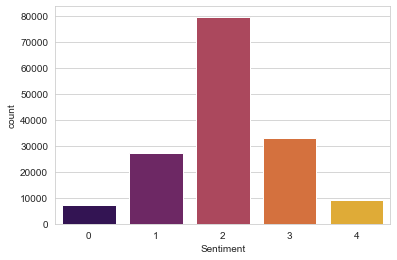

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="whitegrid")
sns.countplot(x='Sentiment',data=data,palette="inferno")

## Pipeline

## Logistic Regression

In [64]:
Pipe_LR= Pipeline([ ('vect', TfidfVectorizer(stop_words='english')),
       ('clf_LR', LogisticRegression())])

parameters = {
       'vect__max_df': (0.25, 0.5),
       'vect__ngram_range': ((1, 1), (1, 2)),
       'vect__use_idf': (True, False),
       'clf_LR__C': (0.1, 1, 10),
    }
X, y = data['Phrase'], data['Sentiment'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [68]:
grid_search = GridSearchCV(Pipe_LR, parameters, n_jobs=3,verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, predictions))
print ('Confusion Matrix:', confusion_matrix(y_test, predictions))
print ('Classification Report:', classification_report(y_test, predictions))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  4.6min
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed: 12.6min finished
C:\Users\DEEPAK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best score: 0.631
Best parameters set:
	clf_LR__C: 10
	vect__max_df: 0.25
	vect__ngram_range: (1, 2)
	vect__use_idf: True
Accuracy: 0.6325131359733436
Confusion Matrix: [[  734   958   422    42     3]
 [  529  3351  3939   323    19]
 [  135  1711 19749  2199   101]
 [   22   175  4040  4849   753]
 [    4    21   355  1454   930]]
Classification Report:               precision    recall  f1-score   support

           0       0.52      0.34      0.41      2159
           1       0.54      0.41      0.47      8161
           2       0.69      0.83      0.75     23895
           3       0.55      0.49      0.52      9839
           4       0.51      0.34      0.41      2764

    accuracy                           0.63     46818
   macro avg       0.56      0.48      0.51     46818
weighted avg       0.62      0.63      0.62     46818



<AxesSubplot:>

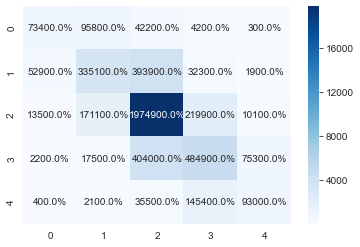

In [71]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt='0.1%', cmap='Blues')